<a href="https://colab.research.google.com/github/pedrotokushiro/Machinelearningtools/blob/main/Completed_Task_1_2_CodeP4_1F21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''>>>>> start CodeP4.1F21 PEDRO TOKUSHIRO
    V.P. Carey ME249, Fall 2021

Intro to Neural Network Modeling 
Keras model for PV power system'''


#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# define median values of input variables - add your values here
Dimed = .011
qofluxmed = 850
mdotmed = 0.09265

#create input data array
xdata = []

#xdata.append([ Di(m), qoflux (kW/m^2), mdot (kg/s)])


xdata.append([0.008, 550, 0.06157])
xdata.append([0.008, 650, 0.07269])
xdata.append([0.008, 750, 0.08396])
xdata.append([0.008, 850, 0.09347])
xdata.append([0.008, 950, 0.10635])
xdata.append([0.008, 1050, 0.11521])
xdata.append([0.008, 1150, 0.1287])
xdata.append([0.008, 850, 0.09516])
xdata.append([0.008, 550, 0.04398])
xdata.append([0.008, 750, 0.05997])
xdata.append([0.008, 950, 0.07596])
xdata.append([0.008, 1050, 0.08343])
xdata.append([0.008, 1150, 0.0919])
xdata.append([0.008, 850, 0.06797])
xdata.append([0.008, 550, 0.0342])
xdata.append([0.008, 750, 0.04664])
xdata.append([0.008, 950, 0.05908])
xdata.append([0.008, 1150, 0.0715])
xdata.append([0.008, 850, 0.05286])
xdata.append([0.011, 550, 0.0846])
xdata.append([0.011, 750, 0.1154])
xdata.append([0.011, 950, 0.1462])
xdata.append([0.011, 1150, 0.177])
xdata.append([0.011, 850, 0.1308])
xdata.append([0.011, 550, 0.06047])
xdata.append([0.011, 750, 0.08246])
xdata.append([0.011, 950, 0.1044])
xdata.append([0.011, 1050, 0.1134])
xdata.append([0.011, 1150, 0.1264])
xdata.append([0.011, 850, 0.0934])
xdata.append([0.011, 550, 0.047])
xdata.append([0.011, 750, 0.06413])
xdata.append([0.011, 950, 0.08124])
xdata.append([0.011, 1150, 0.09834])
xdata.append([0.011, 850, 0.072691])
xdata.append([0.011, 700, 0.087196])
xdata.append([0.013, 550, 0.10005])
xdata.append([0.013, 750, 0.13644])
xdata.append([0.013, 950, 0.17282])
xdata.append([0.013, 1150, 0.2092])
xdata.append([0.013, 850, 0.15463])
xdata.append([0.013, 550, 0.07147])
xdata.append([0.013, 750, 0.09745])
xdata.append([0.013, 950, 0.12344])
xdata.append([0.013, 1050, 0.13302])
xdata.append([0.013, 1150, 0.1494])
xdata.append([0.013, 850, 0.11045])
xdata.append([0.013, 550, 0.05558])
xdata.append([0.013, 750, 0.0758])
xdata.append([0.013, 950, 0.09601])
xdata.append([0.013, 1150, 0.1162])
xdata.append([0.013, 850, 0.0859])


xarray= np.array(xdata)

# normalizing the data 

Di = xarray[:, 0]
qoflux = xarray[:, 1]
mdot = xarray[:, 2]

Di_median = np.median(Di)
qoflux_median = np.median(qoflux)
mdot_median = np.median(mdot)

xarray[:,0] = Di / Di_median
xarray[:,1] = qoflux / qoflux_median
xarray[:,2] = mdot / mdot_median

print(xdata)
print(xarray)

# define meadian values of output variables - add your values here
exit_med = 0.735
temp_med = 304.7

#create output data array
ydata = []


#ydata.append([ exit quality, max wall temperature (deg C)])

ydata.append([0.525, 306.7])
ydata.append([0.525, 298.5])
ydata.append([0.525, 294.5])
ydata.append([0.525, 290.2])
ydata.append([0.524, 286.9])
ydata.append([0.524, 284.1])
ydata.append([0.525, 281.7])
ydata.append([0.524, 290.3])
ydata.append([0.734, 307.9])
ydata.append([0.735, 295.5])
ydata.append([0.735, 287.8])
ydata.append([0.735, 285.0])
ydata.append([0.735, 282.5])
ydata.append([0.734, 291.3])
ydata.append([ 0.945, 308.6])
ydata.append([0.945, 296.2])
ydata.append([0.945, 288.5])
ydata.append([0.945, 283.1])
ydata.append([0.945, 291.9])
ydata.append([ 0.525, 328.0])
ydata.append([0.525, 311.2])
ydata.append([0.525, 300.8])
ydata.append([0.525, 293.6])
ydata.append([0.525, 305.5])
ydata.append([0.735, 329.6])
ydata.append([0.735, 312.6])
ydata.append([0.735, 302.0])
ydata.append([0.735, 299.4])
ydata.append([0.735, 294.8])
ydata.append([0.735, 306.8])
ydata.append([ 0.945, 330.7])
ydata.append([0.945, 313.6])
ydata.append([0.944, 302.9])
ydata.append([0.945, 295.6])
ydata.append([0.944, 307.7])
ydata.append([0.734, 324.7])
ydata.append([0.525, 342.2])
ydata.append([0.524,  322.3])
ydata.append([0.524, 310.0])
ydata.append([0.525, 301.6])
ydata.append([0.524, 315.5])
ydata.append([0.734, 344.1])
ydata.append([0.735, 324.0])
ydata.append([0.735, 311.5])
ydata.append([0.735, 306.3])
ydata.append([0.735, 302.9])
ydata.append([0.734, 317.1])
ydata.append([0.945, 345.3])
ydata.append([0.944, 325.1])
ydata.append([0.944, 312.5])
ydata.append([0.945, 303.9])
ydata.append([0.945, 318.2])

yarray= np.array(ydata)

exit = yarray[:,0]
temp = yarray[:,1]

exitmed = np.median(exit)
tempmed = np.median(temp)

yarray[:,0] = exit / exitmed
yarray[:,1] = temp / tempmed




print (ydata)
print (yarray)

[[0.008, 550, 0.06157], [0.008, 650, 0.07269], [0.008, 750, 0.08396], [0.008, 850, 0.09347], [0.008, 950, 0.10635], [0.008, 1050, 0.11521], [0.008, 1150, 0.1287], [0.008, 850, 0.09516], [0.008, 550, 0.04398], [0.008, 750, 0.05997], [0.008, 950, 0.07596], [0.008, 1050, 0.08343], [0.008, 1150, 0.0919], [0.008, 850, 0.06797], [0.008, 550, 0.0342], [0.008, 750, 0.04664], [0.008, 950, 0.05908], [0.008, 1150, 0.0715], [0.008, 850, 0.05286], [0.011, 550, 0.0846], [0.011, 750, 0.1154], [0.011, 950, 0.1462], [0.011, 1150, 0.177], [0.011, 850, 0.1308], [0.011, 550, 0.06047], [0.011, 750, 0.08246], [0.011, 950, 0.1044], [0.011, 1050, 0.1134], [0.011, 1150, 0.1264], [0.011, 850, 0.0934], [0.011, 550, 0.047], [0.011, 750, 0.06413], [0.011, 950, 0.08124], [0.011, 1150, 0.09834], [0.011, 850, 0.072691], [0.011, 700, 0.087196], [0.013, 550, 0.10005], [0.013, 750, 0.13644], [0.013, 950, 0.17282], [0.013, 1150, 0.2092], [0.013, 850, 0.15463], [0.013, 550, 0.07147], [0.013, 750, 0.09745], [0.013, 950, 0.

In [ ]:
print(len(xarray))

52


In [ ]:
import random
# splitting the data into train and test data, into 3/4ths train and 1/4th test

print(len(xarray))
random.shuffle(xarray)

train_datax = xarray[:39]
test_datax = xarray[39:]

print(train_datax)
print(test_datax)

xarray = train_datax


print(len(yarray))
random.shuffle(yarray)

train_datay = yarray[:39]
test_datay = yarray[39:]

print(train_datay)
print(test_datay)

yarray = train_datay

52
[[0.72727273 0.64705882 0.66454398]
 [0.72727273 0.76470588 0.78456557]
 [0.72727273 0.64705882 0.66454398]
 [0.72727273 0.76470588 0.78456557]
 [0.72727273 0.88235294 0.90620615]
 [0.72727273 0.88235294 0.90620615]
 [0.72727273 0.64705882 0.66454398]
 [0.72727273 0.76470588 0.78456557]
 [0.72727273 1.         1.00885051]
 [0.72727273 1.35294118 1.38909876]
 [0.72727273 0.88235294 0.64727469]
 [0.72727273 0.88235294 0.90620615]
 [0.72727273 0.76470588 0.78456557]
 [0.72727273 1.23529412 0.9004857 ]
 [0.72727273 1.23529412 0.9004857 ]
 [0.72727273 0.64705882 0.36913114]
 [0.72727273 1.11764706 0.63766865]
 [0.72727273 0.76470588 0.78456557]
 [0.72727273 1.23529412 1.24349703]
 [0.72727273 1.35294118 0.77172153]
 [0.72727273 0.88235294 0.90620615]
 [0.72727273 1.35294118 1.38909876]
 [0.72727273 0.64705882 0.47468969]
 [0.72727273 1.23529412 0.9004857 ]
 [0.72727273 1.23529412 1.24349703]
 [1.         0.64705882 0.65267134]
 [1.         1.         1.41176471]
 [1.         1.11764706 1

In [ ]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -1, maxval=1)

model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(12, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])



In [ ]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = tf.keras.optimizers.RMSprop(0.000009)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [ ]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 5000, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=5000,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 6ms/step - loss: 0.0543
Epoch 2503/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.0670
Epoch 2504/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.0676
Epoch 2505/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.0604
Epoch 2506/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.0602
Epoch 2507/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.0587
Epoch 2508/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.0632
Epoch 2509/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.0613
Epoch 2510/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.0623
Epoch 2511/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.0639
Epoch 2512/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.0641
Epoch 2513/5000
2/2 [==============================] - 0s 11

In [ ]:


# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.








In [ ]:
#Construction: lists of mdot data and mdot prediction - TRAINING set

DATA = []
PRED = []

xT = train_datax
yT = train_datay
xV = test_datax
yV = test_datay


e = 0

for i in range(0,len(xT)): 
    test = [[xT[i][0], xT[i][1], xT[i][2]]]
    testarray = np.array(test)
    mdot_model = recon_model.predict(testarray)
    DATA += [yT[i][0]*mdotmed]
    PRED += [mdot_model[0][0]*mdotmed]
    e += abs(DATA[i]-PRED[i])
    
MAE_T = e/len(xT)



In [ ]:
print('Mass flow MAE (trainind set) =', MAE_T, "kg/s")
#to compare with the magnitude of mdot

print('percentage of error compared to the magnitude of the mass flow (%) =', MAE_T/mdot_median*100, '%')


Mass flow MAE (trainind set) = 0.007416936849353409 kg/s
percentage of error compared to the magnitude of the mass flow (%) = 8.005328493635627 %


[[0.71685135 0.95619476]
 [0.71667105 0.9561943 ]
 [0.71685135 0.95619476]
 [0.71667105 0.9561943 ]
 [0.71637404 0.9561989 ]
 [0.71637404 0.9561989 ]
 [0.71685135 0.95619476]
 [0.71667105 0.9561943 ]
 [0.7170786  0.9561941 ]
 [1.1557841  0.94931906]
 [1.0429839  0.95097214]
 [0.71637404 0.9561989 ]
 [0.71667105 0.9561943 ]
 [0.7217352  0.9561507 ]
 [0.7217352  0.9561507 ]
 [0.71764916 0.9561879 ]
 [1.2841525  0.94782054]
 [0.71667105 0.9561943 ]
 [1.1504848  0.94939184]
 [1.2826682  0.9478292 ]
 [0.71637404 0.9561989 ]
 [1.1557841  0.94931906]
 [0.7179751  0.95618284]
 [0.7217352  0.9561507 ]
 [1.1504848  0.94939184]
 [0.71737933 0.9562085 ]
 [0.7161082  0.95620936]
 [0.71602225 0.9561922 ]
 [1.0429839  0.95097214]
 [0.7217352  0.9561507 ]
 [1.1573027  0.9492991 ]
 [0.71671915 0.95618623]
 [1.1573027  0.9492991 ]
 [1.1717887  0.9491014 ]
 [0.7179751  0.95618284]
 [1.2508702  0.9481367 ]
 [1.1854582  0.94891936]
 [1.1717887  0.9491014 ]
 [0.714426   0.9562325 ]]
[[0.71428571 1.00656383]

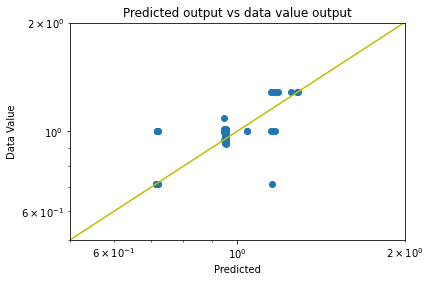

In [ ]:
# comparison of training data as a whole rather than separated between exit quality and max wall temp
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X=np.linspace(0,10,2)
Y=np.linspace(0,10,2)

output = recon_model.predict(xarray)
print(output)
print(yarray)

print('Mean Absolution Error' , mean_absolute_error(output,yarray))

plt.scatter(output,yarray)
plt.title('Predicted output vs data value output')
plt.xlabel('Predicted')
plt.ylabel('Data Value')
plt.loglog()

plt.xlim(xmax = 2, xmin = 0.5)
plt.ylim(ymax = 2, ymin = 0.5)
plt.plot(X,Y,'y', label='slope=1 line in comparison')

[0.71685135 0.71667105 0.71685135 0.71667105 0.71637404 0.71637404
 0.71685135 0.71667105 0.7170786  1.1557841  1.0429839  0.71637404
 0.71667105 0.7217352  0.7217352  0.71764916 1.2841525  0.71667105
 1.1504848  1.2826682  0.71637404 1.1557841  0.7179751  0.7217352
 1.1504848  0.71737933 0.7161082  0.71602225 1.0429839  0.7217352
 1.1573027  0.71671915 1.1573027  1.1717887  0.7179751  1.2508702
 1.1854582  1.1717887  0.714426  ]
[0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 0.71428571
 0.71292517 0.71292517 0.71428571 0.71292517 1.         0.71292517
 0.99863946 0.71292517 0.99863946 0.71292517 1.28571429 0.99863946
 1.         1.28571429 0.71428571 1.28571429 1.         1.
 1.28571429 0.71428571 0.71428571 0.71428571 1.         0.71292517
 1.28571429 0.71428571 1.         1.28571429 0.71428571 1.28571429
 1.28435374 1.         0.71292517]
Mean Absolution Error 0.05304723043775957


[]

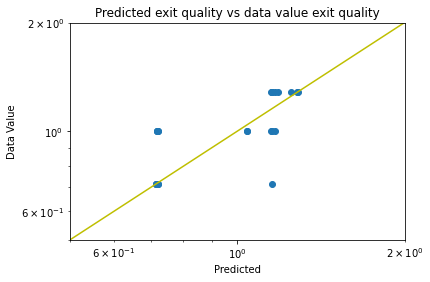

In [ ]:
# this is the comparison of the trained model predictions to the training data set of the exit quality

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X=np.linspace(0,10,2)
Y=np.linspace(0,10,2)

output = recon_model.predict(xarray)
print(output[:,0])
print(yarray[:,0])

print('Mean Absolution Error' , mean_absolute_error(output,yarray))

plt.scatter(output[:,0],yarray[:,0])
plt.title('Predicted exit quality vs data value exit quality')
plt.xlabel('Predicted')
plt.ylabel('Data Value')


plt.xlim(xmax = 2, xmin = 0.5)
plt.ylim(ymax = 2, ymin = 0.5)
plt.plot(X,Y,'y', label='slope=1 line in comparison')
plt.loglog()

[0.95619476 0.9561943  0.95619476 0.9561943  0.9561989  0.9561989
 0.95619476 0.9561943  0.9561941  0.94931906 0.95097214 0.9561989
 0.9561943  0.9561507  0.9561507  0.9561879  0.94782054 0.9561943
 0.94939184 0.9478292  0.9561989  0.94931906 0.95618284 0.9561507
 0.94939184 0.9562085  0.95620936 0.9561922  0.95097214 0.9561507
 0.9492991  0.95618623 0.9492991  0.9491014  0.95618284 0.9481367
 0.94891936 0.9491014  0.9562325 ]
[1.00656383 1.00656383 0.96652445 0.96652445 0.95241221 0.97965212
 0.93239252 0.9527404  0.96652445 0.93239252 0.94453561 0.93239252
 1.01050213 0.93239252 1.01050213 0.93239252 1.01279947 0.95602232
 0.96980637 0.94683295 0.92451592 0.9291106  0.94453561 0.96980637
 0.95799147 0.96357073 0.98720053 0.95241221 0.94453561 0.94158188
 1.01279947 0.95241221 0.94453561 0.9291106  1.00656383 1.08532983
 0.99409255 0.94453561 1.01739416]
Mean Absolution Error 0.05304723043775957


[]

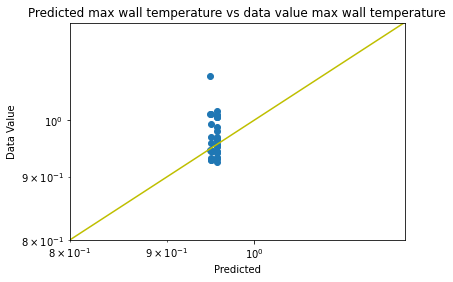

In [ ]:
# TRAINING DATA - MAXIMUM WALL TEMPERATURE 

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

X=np.linspace(0,10,2)
Y=np.linspace(0,10,2)

output = recon_model.predict(xarray)
print(output[:,1])
print(yarray[:,1])

print('Mean Absolution Error' , mean_absolute_error(output,yarray))

plt.scatter(output[:,1],yarray[:,1])
plt.title('Predicted max wall temperature vs data value max wall temperature')
plt.xlabel('Predicted')
plt.ylabel('Data Value')


plt.xlim(xmax = 1.2, xmin = 0.8)
plt.ylim(ymax = 1.2, ymin = 0.8)
plt.plot(X,Y,'y', label='slope=1 line in comparison')

plt.loglog()

In [ ]:
#Construction: lists of mdot data and mdot prediction - VALIDATION set

DATA = []
PRED = []

xT = train_datax
yT = train_datay
xV = test_datax
yV = test_datay


e = 0

for i in range(0,len(xV)): 
    test = [[xV[i][0], xV[i][1], xV[i][2]]]
    testarray = np.array(test)
    mdot_model = recon_model.predict(testarray)
    DATA += [yV[i][0]*mdotmed]
    PRED += [mdot_model[0][0]*mdotmed]
    e += abs(DATA[i]-PRED[i])
    
MAE_T = e/len(xV)


print('Mass flow MAE (training set) =', MAE_T, "kg/s")
#to compare with the magnitude of mdot

print('Percentage of error compared to the magnitude of the mass flow (%) =', MAE_T/mdot_median*100, '%')


Mass flow MAE (training set) = 0.024043598374789883 kg/s
Percentage of error compared to the magnitude of the mass flow (%) = 25.95099662686442 %


[1.1504848  0.71527255 1.0224216  1.2841525  0.7192718  0.7162077
 0.71775186 1.1504848  1.1772771  1.1573027  0.7171912  0.714426
 0.7179751 ]
[0.99863946 1.28571429 1.28571429 1.         0.71428571 0.71428571
 0.71428571 0.71428571 1.28571429 1.28571429 1.         1.28571429
 1.28435374]
Mean Absolution Error 0.15768934705906973


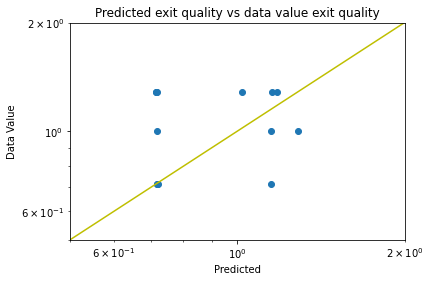

In [ ]:
####################################### VALIDATION DATA SET
output = recon_model.predict(xV)
print(output[:,0])
print(yV[:,0])

print('Mean Absolution Error' , mean_absolute_error(output,yV))

plt.scatter(output[:,0],yV[:,0])
plt.title('Predicted exit quality vs data value exit quality')
plt.xlabel('Predicted')
plt.ylabel('Data Value')
plt.loglog()

plt.xlim(xmax = 2, xmin = 0.5)
plt.ylim(ymax = 2, ymin = 0.5)
plt.plot(X,Y,'y', label='slope=1 line in comparison')

[0.94939184 0.956194   0.9512721  0.94782054 0.9561506  0.9561833
 0.9561894  0.94939184 0.9490757  0.9492991  0.9561844  0.9562325
 0.95618284]
[0.95602232 0.95799147 1.08532983 1.06334099 0.96652445 1.00262553
 1.02133246 1.00262553 1.13324582 0.9291106  1.00525107 0.95799147
 0.99409255]
Mean Absolution Error 0.15768934705906973


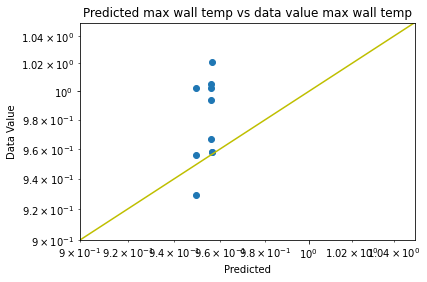

In [ ]:
output = recon_model.predict(xV)
print(output[:,1])
print(yV[:,1])

print('Mean Absolution Error' , mean_absolute_error(output,yV))

plt.scatter(output[:,1],yV[:,1])
plt.title('Predicted max wall temp vs data value max wall temp')
plt.xlabel('Predicted')
plt.ylabel('Data Value')
plt.loglog()

X=np.linspace(0,10,2)
Y=np.linspace(0,10,2)

plt.xlim(xmax = 1.05, xmin = 0.9)
plt.ylim(ymax = 1.05, ymin = 0.9)

plt.plot(X,Y,'y', label='slope=1 line in comparison')

In [ ]:
import numpy as np
#plt.figure(figsize=(20,10))
Di = np.linspace(7,13,52)
mdot = np.linspace(0.05,0.15,52)
q = 750.

Dimed = .011
qofluxmed = 850
mdotmed = 0.09265

x_med = [0.011 , 850 , 0.09265]
x_med = np.array(x_med)
x = np.zeros ((len(Di) ,len(mdot)))
Tmax = np.zeros((len(Di),len(mdot)))

for i in range(len(mdot)):
  for j in range(len(Di)):
    output = recon_model.predict(np.array([[Di[j]/1000,q,mdot[i]]/x_med]))
    x[j][i] = output[0][0]*exit_med
    Tmax[j][i] = output[0][1]*temp_med


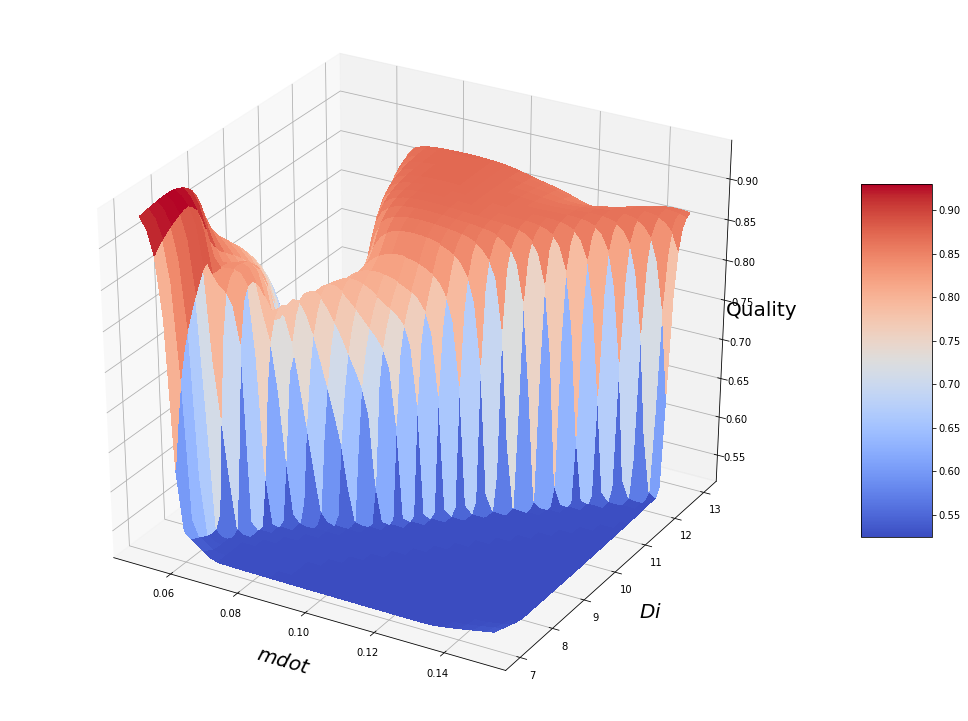

In [ ]:
import matplotlib.pyplot as plt

X, Y = np.meshgrid(mdot,Di)

fig = plt.figure()
ax = fig.gca(projection = '3d')
fig.set_size_inches(18,13)

surf1 = ax.plot_surface(X, Y, x, cmap=plt.cm.coolwarm, linewidth=0, antialiased = False)
fig.colorbar(surf1, shrink=0.5, aspect=5)
plt.xlabel(r'$mdot$', fontsize=20, labelpad=15)
plt.ylabel(r'$Di$', fontsize=20, labelpad=15)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'Quality', fontsize=20, rotation=0)
# ax.view_init(25,-135)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

X, Y = np.meshgrid(mdot,Di)

fig = plt.figure()
ax = fig.gca(projection = '3d')
fig.set_size_inches(18,13)

surf1 = ax.plot_surface(X, Y, Tmax, cmap=plt.cm.coolwarm, linewidth=0, antialiased = False)
fig.colorbar(surf1, shrink=0.5, aspect=5)
plt.xlabel(r'$mdot$', fontsize=20, labelpad=15)
plt.ylabel(r'$Di$', fontsize=20, labelpad=15)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'Quality', fontsize=20, rotation=0)
# ax.view_init(25,-135)
plt.show()


NameError: ignored

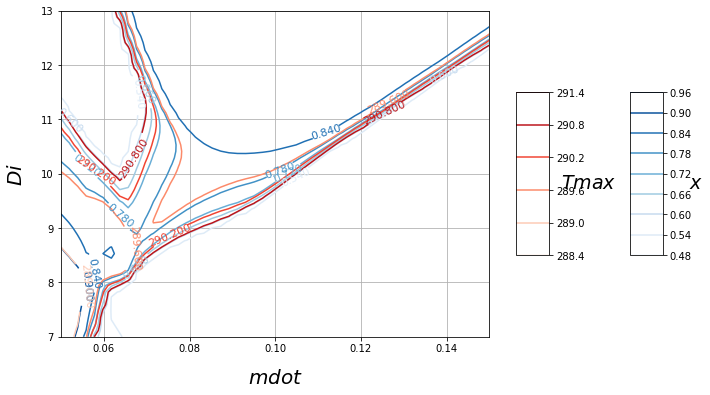

In [ ]:
fig = plt.figure()
fig.set_size_inches(12,6)

contours_x = plt.contour(X,Y, x, 6, cmap= plt.cm.Blues)
contours_Tmax = plt.contour(X,Y, Tmax, 4, cmap= plt.cm.Reds)

plt.clabel(contours_x, inline=True, fontsize=11)
plt.clabel(contours_Tmax, inline=True, fontsize=11)
cbar_x = plt.colorbar(contours_x, shrink=0.5, aspect=5)
cbar_x.set_label('$x$', rotation=0, fontsize=19)
cbar_Tmax = plt.colorbar(contours_Tmax, shrink=0.5,aspect=5)
cbar_Tmax.set_label('$Tmax$', rotation=0, fontsize=19)


plt.xlabel(r'$mdot$', fontsize=20, labelpad=15)
plt.ylabel(r'$Di$', fontsize=20, labelpad=15)
plt.grid()
plt. show()